<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MLP-Classification---MNIST-Fashion" data-toc-modified-id="MLP-Classification---MNIST-Fashion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MLP Classification - MNIST Fashion</a></span></li><li><span><a href="#MLP-Regression---California-Housing" data-toc-modified-id="MLP-Regression---California-Housing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MLP Regression - California Housing</a></span></li><li><span><a href="#Functional-API" data-toc-modified-id="Functional-API-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Functional API</a></span><ul class="toc-item"><li><span><a href="#Customizable-architecture" data-toc-modified-id="Customizable-architecture-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Customizable architecture</a></span></li><li><span><a href="#Multiple-inputs" data-toc-modified-id="Multiple-inputs-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Multiple inputs</a></span></li><li><span><a href="#Adding-extra-output" data-toc-modified-id="Adding-extra-output-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Adding extra output</a></span></li></ul></li><li><span><a href="#Subclassing-API-for-Dynamic-Model" data-toc-modified-id="Subclassing-API-for-Dynamic-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Subclassing API for Dynamic Model</a></span></li><li><span><a href="#Save-and-load-the-model" data-toc-modified-id="Save-and-load-the-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save and load the model</a></span></li></ul></div>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [2]:
tf.__version__

'2.4.1'

In [3]:
keras.__version__

'2.4.0'

## MLP Classification - MNIST Fashion

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [5]:
X_train, X_test = X_train / 255, X_test / 255
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=5000, stratify=y_train)

In [6]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , 
               "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ] 

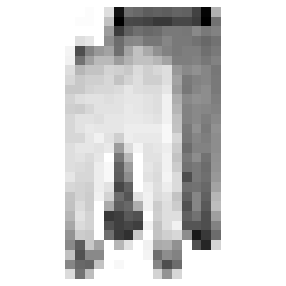

In [7]:
fig = plt.figure(figsize=(5, 5))
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')
plt.show()

In [8]:
class_names[y_train[0]]

'Trouser'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model2 = models.Sequential([ 
    layers.InputLayer(input_shape=[28, 28]),
    layers.Flatten(),
    layers.Dense(300, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

In [14]:
hidden1 = model.layers[1]

In [15]:
hidden1.name

'dense'

In [16]:
model.layers[0].name

'flatten'

In [17]:
weights, biases = hidden1.get_weights()

In [18]:
weights.shape

(784, 300)

In [19]:
biases.shape

(300,)

In [20]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9782 - accuracy: 0.6835 - val_loss: 0.5606 - val_accuracy: 0.7888
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5044 - accuracy: 0.8275 - val_loss: 0.4467 - val_accuracy: 0.8416
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4477 - accuracy: 0.8438 - val_loss: 0.4164 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4255 - accuracy: 0.8504 - val_loss: 0.4055 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3977 - accuracy: 0.8595 - val_loss: 0.3853 - val_accuracy: 0.8642
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3787 - accuracy: 0.8698 - val_loss: 0.3888 - val_accuracy: 0.8562
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3672 - accuracy: 0.8726 - val_loss: 0.3646 - val_accuracy:

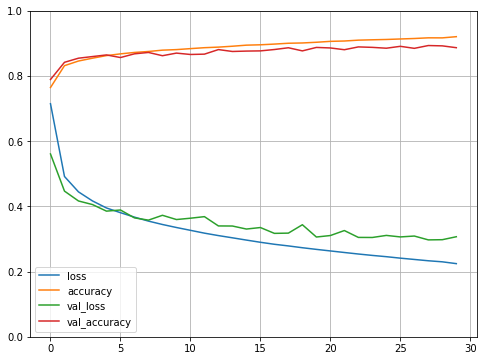

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 6), grid=True, ylim=[0, 1])
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 688us/step - loss: 0.3332 - accuracy: 0.8820


[0.3332008123397827, 0.8820000290870667]

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = y_proba.argmax(axis=1)
print([class_names[i] for i in y_pred])

['Ankle boot', 'Pullover', 'Trouser']


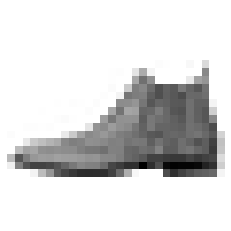

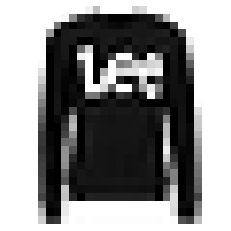

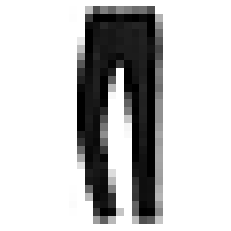

In [25]:
for x in X_new:
    plt.axis('off')
    plt.imshow(x, cmap='gray_r')
    plt.show()

## MLP Regression - California Housing

In [26]:
housing = fetch_california_housing()

In [27]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(housing['data'], housing['target'])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train.shape[1]

8

In [30]:
model = models.Sequential([
    layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_split=0.25)

Epoch 1/20
363/363 [==============================] - 0s 839us/step - loss: 1.6121 - val_loss: 1.1312
Epoch 2/20
363/363 [==============================] - 0s 599us/step - loss: 2.8786 - val_loss: 0.4605
Epoch 3/20
363/363 [==============================] - 0s 587us/step - loss: 0.4604 - val_loss: 0.4239
Epoch 4/20
363/363 [==============================] - 0s 608us/step - loss: 0.4445 - val_loss: 0.3954
Epoch 5/20
363/363 [==============================] - 0s 827us/step - loss: 0.4304 - val_loss: 0.3846
Epoch 6/20
363/363 [==============================] - 0s 690us/step - loss: 0.4225 - val_loss: 0.3807
Epoch 7/20
363/363 [==============================] - 0s 593us/step - loss: 0.4030 - val_loss: 0.3810
Epoch 8/20
363/363 [==============================] - 0s 731us/step - loss: 0.4141 - val_loss: 0.3763
Epoch 9/20
363/363 [==============================] - 0s 820us/step - loss: 0.3981 - val_loss: 0.3696
Epoch 10/20
363/363 [==============================] - 0s 842us/step - loss: 0.399

In [31]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 415us/step - loss: 0.3729


In [32]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[0.8066754],
       [1.0461134],
       [1.2889193]], dtype=float32)

## Functional API

### Customizable architecture

input -> hidden1 -> hidden2 \
input + hidden2 -> output

In [33]:
input_ = layers.Input(shape=X_train.shape[1:])
hidden1 = layers.Dense(30, activation='relu')(input_)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([input_, hidden2])
output = layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [34]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_2[0][0]                    
                                                                 dense_9[0][0]                

### Multiple inputs
A subset of features go deep and the other subset go wide (concatenate with the hidden layers)

In [35]:
input_A = layers.Input(shape=[5], name='wide_input')
input_B = layers.Input(shape=[6], name='deep_input')
hidden1 = layers.Dense(30, activation='relu')(input_B)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([input_A, hidden2])
output = layers.Dense(1)(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [36]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
____________________________________________________________________________________________

In [37]:
# Need to slice the datasets into 2 to feed in the model
model.compile(loss='mse', 
              optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
# X_val_A, X_val_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_new[:, :5], X_new[:, 2:]

In [38]:
history = model.fit([X_train_A, X_train_B], y_train, epochs=20, 
                    validation_split=0.25)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.1767 - val_loss: 0.8562
Epoch 2/20
363/363 [==============================] - 0s 975us/step - loss: 0.8560 - val_loss: 0.6730
Epoch 3/20
363/363 [==============================] - 0s 976us/step - loss: 0.6995 - val_loss: 0.6136
Epoch 4/20
363/363 [==============================] - 0s 744us/step - loss: 0.6267 - val_loss: 0.5831
Epoch 5/20
363/363 [==============================] - 0s 744us/step - loss: 0.5963 - val_loss: 0.5589
Epoch 6/20
363/363 [==============================] - 0s 789us/step - loss: 0.5800 - val_loss: 0.5419
Epoch 7/20
363/363 [==============================] - 0s 729us/step - loss: 0.5551 - val_loss: 0.5270
Epoch 8/20
363/363 [==============================] - 0s 764us/step - loss: 0.5733 - val_loss: 0.5152
Epoch 9/20
363/363 [==============================] - 0s 853us/step - loss: 0.5573 - val_loss: 0.5063
Epoch 10/20
363/363 [==============================] - 0s 731us/step - loss: 0.5554 

In [39]:
mse_test = model.evaluate([X_test_A, X_test_B], y_test)

162/162 [==============================] - 0s 433us/step - loss: 0.4948


In [40]:
y_pred = model.predict([X_new_A, X_new_B])
y_pred

array([[0.9381594],
       [0.5459122],
       [1.1018821]], dtype=float32)

### Adding extra output
Get the output from hidden2

In [55]:
input_A = layers.Input(shape=[5], name='wide_input')
input_B = layers.Input(shape=[6], name='deep_input')
hidden1 = layers.Dense(30, activation='relu')(input_B)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([input_A, hidden2])
output = layers.Dense(1, name='main_output')(concat)
aux_output = layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [57]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')
history = model.fit([X_train_A, X_train_B], [y_train, y_train], 
                    epochs=20,
                    validation_split=0.25)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.5441 - main_output_loss: 1.3395 - aux_output_loss: 3.3856 - val_loss: 0.6226 - val_main_output_loss: 0.5386 - val_aux_output_loss: 1.3786
Epoch 2/20
363/363 [==============================] - 0s 810us/step - loss: 0.6498 - main_output_loss: 0.5772 - aux_output_loss: 1.3034 - val_loss: 0.5473 - val_main_output_loss: 0.4791 - val_aux_output_loss: 1.1609
Epoch 3/20
363/363 [==============================] - 0s 817us/step - loss: 0.6058 - main_output_loss: 0.5433 - aux_output_loss: 1.1685 - val_loss: 0.5129 - val_main_output_loss: 0.4576 - val_aux_output_loss: 1.0104
Epoch 4/20
363/363 [==============================] - 0s 820us/step - loss: 0.5569 - main_output_loss: 0.5023 - aux_output_loss: 1.0484 - val_loss: 0.4831 - val_main_output_loss: 0.4385 - val_aux_output_loss: 0.8848
Epoch 5/20
363/363 [==============================] - 0s 828us/step - loss: 0.5165 - main_output_loss: 0.4746 - aux_output_loss: 0.8936 - 

In [58]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 651us/step - loss: 0.3736 - main_output_loss: 0.3576 - aux_output_loss: 0.5177


In [59]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [60]:
print(y_pred_main)
print(y_pred_aux)

[[0.75545996]
 [0.8937127 ]
 [1.1646376 ]]
[[1.3192434]
 [0.9304926]
 [1.4566332]]


## Subclassing API for Dynamic Model
See examples: https://www.tensorflow.org/guide/keras/custom_layers_and_models \
Similar to Pytorch code

## Save and load the model
Won't work with the subclassing API

In [61]:
model.save('my_keras_model.h5')

In [62]:
model_new = models.load_model('my_keras_model.h5')